In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import stats

import common

# количество случайных чисел
n = 10000

# матрица вероятностей
A = [
#    0.24, 0.36, 0.40
    [0.05, 0.15, 0.25],
    [0.07, 0.08, 0.07],
    [0.12, 0.13, 0.08]
#    0.24, 0.60, 1.00
]

sum_by_x = []
x = 0
for i in range(len(A[0])):
    for j in range(len(A)):
        x += A[j][i]
    sum_by_x.append(x)


def get_x_index(variant):
    for i in range(len(sum_by_x)):
        if variant < sum_by_x[i]:
            return i


def get_y_index(variant, x_index):
    y = 0
    for i in range(len(A)):
        y += A[i][x_index]
        # print(y)
        if variant < y:
            return i
    print("ERROR: variant = ", variant)


result = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]

In [2]:
# возьмем n случайных чисел по оси X и по оси Y

rand_x = rand.randint(0, 99, n) / 100
rand_y = rand.randint(0, 99, n) / 100

In [3]:
# полученные числа кладем в матрицу result

xs = []
ys = []
for i in range(n):
    x_index = get_x_index(rand_x[i])  # определяем индекс для данного числа  x
    xs.append(x_index)
    sum_one_line = 0
    for j in range(len(A)):
        sum_one_line += A[j][x_index]
    # изначально y может принимать значения [0, 1)
    # умножим полученный y на максимальное значение, которое возможно принять в столбце под индексом x_index матрицы A
    y_variant = rand_y[i] * sum_one_line
    y_index = get_y_index(y_variant, x_index)
    ys.append(y_index)
    result[y_index][x_index] += 1  # x_index и y_index это индекс вероятности, в которую произошло попадание

Heatmap оригинальной матрицы


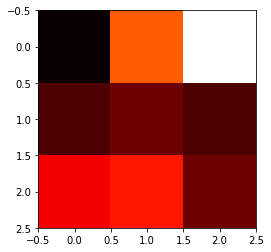

In [4]:
print("Heatmap оригинальной матрицы")
plt.imshow(A, cmap='hot', interpolation='nearest')
plt.show()

Heatmap полученной матрицы матрицы


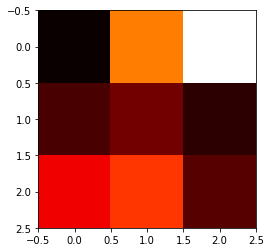

In [5]:
print("Heatmap полученной матрицы матрицы")
plt.imshow(result, cmap='hot', interpolation='nearest')
plt.show()

In [6]:
print("Heatmap матриц похожи, но незначительно отличаются")

Heatmap матриц похожи, но незначительно отличаются


In [7]:
print("E[X] of A:", common.expectation(sum_by_x))
A_ys = []
for y_row in A:
    A_ys.append(sum(y_row))
print("E[Y] of A:", common.expectation(A_ys))

E[X] of A: 0.6133333333333334
E[Y] of A: 0.3333333333333333


In [8]:
print("E[X] of result:", common.expectation(xs))
print("E[Y] of result:", common.expectation(ys))
print("Мат. ожидания отличаются значительно")

E[X] of result: 1.1373
E[Y] of result: 0.8783
Мат. ожидания отличаются значительно


In [9]:
print("Коэффициент корреляции матрицы A:", common.correlation_coefficient(sum_by_x, A_ys))

Коэффициент корреляции матрицы A: -0.4954199218777656


In [10]:
print("Коэффициент корреляции матрицы result:", common.correlation_coefficient(xs, ys))

Коэффициент корреляции матрицы result: -0.3157442119296872


In [11]:
print("Доверительный интервал для E[X] матрицы A:", common.get_m_interval(values=sum_by_x))
print("Доверительный интервал для E[Y] матрицы A:", common.get_m_interval(values=A_ys))

Доверительный интервал для E[X] матрицы A: (0.504296757695018, 0.7223699089716488)
Доверительный интервал для E[Y] матрицы A: (0.3233500490786259, 0.3433166175880407)


In [12]:
print("Доверительный интервал для E[X] матрицы result:", common.get_m_interval(values=xs))
print("Доверительный интервал для E[Y] матрицы result:", common.get_m_interval(values=ys))

Доверительный интервал для E[X] матрицы result: (1.1254802452840011, 1.1491197547159988)
Доверительный интервал для E[Y] матрицы result: (0.8632454534439994, 0.8933545465560006)


In [13]:
chi2 = common.get_xi_2(A, result, n)
print("Хи квадрат:", chi2)

Хи квадрат: 0.0025462109759551606


In [14]:
print("Data is great" if chi2 < 15.5 else "Data is bad")

Data is great
